<a href="https://colab.research.google.com/github/reemf123/Udemy-Neural-Networks-from-Scratch/blob/main/Udemey_Neural_Networks_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np

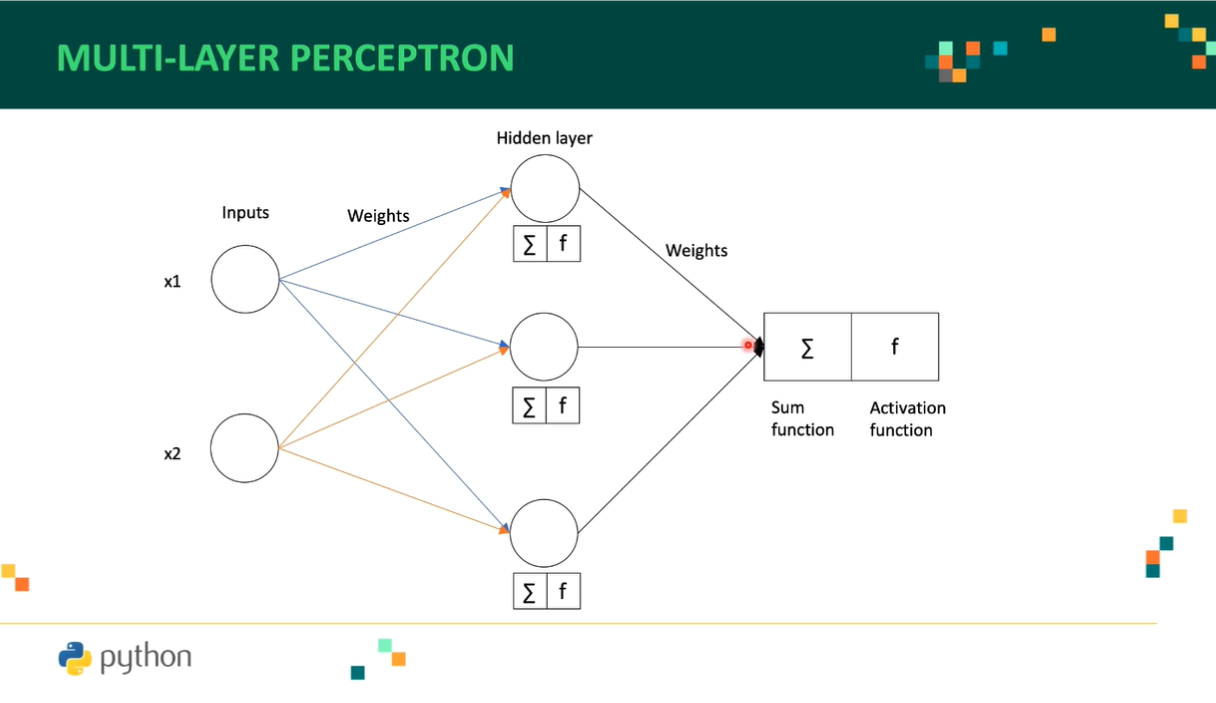

**General Algorithm**

1) Initialize Weights Randomly

2) Calculate Outputs (summation & sigmoid function output)

3) Calculate the error (Cost/Loss Function)

4) Calculate the new weights

5) Update the weights

6) Check if the number of epochs have been reached

  - If the number of epochs has not been reached, return to Step 2.

**Sigmoid Function**:
- when x is small and negative, function approaches 0
- when x is big and positive, function approaches 1

In [55]:
# Activation Function
# Can't use step function for more complex systems
def sigmoid(sum):
  return (1) / (1 + np.exp(-sum))

Activation function gets applied onto the summations at each level

**Order of Operations**:

1) Multiply inputs by weights product

2) Sum each product

3) Apply activation function to product

4) Repeat Steps 1 - 3 for the next layer until you reach the output.

5) Remeber, the output should equal the output of the activation function when the final sum is inputted.

6) Use the truths and the final output to compute the loss function (error)

**Goal: Find relationship between inputs and output of XOR Gate.**


Inputs:                 
0, 0                   
0, 1                   
1, 0                   
1, 1

Outputs:
0
1
1
0


Feed Forward:
- data flows from left to right through hidden layer
- input layer --> hidden layer --> output

Example: Think of learning the outputs to a logical gate with 2 inputs either 0 or 1

**Layer 1 Calculations:**

*Summations below represent the values of the 3 hidden neurons in the second layer*

(Repeat sum_n calculations for the potential input pairs)

$sum_{1}$ = $input_{1}$$_{1}$ * $weight1[0]$ + $input_{1}$$_{2}$ * $weight2[0]$

  - Neuron 1 = activation(sum1)


$sum_{2}$ = $input_{1}$$_{1}$ * $weight1[1]$ + $input_{1}$$_{2}$ * $weight2[1]$
  - Neuron 2 = activation(sum2)


$sum_{3}$ = $input_{1}$$_{1}$ * $weight1[2]$ + $input_{1}$$_{2}$ * $weight2[2]$
  - Neuron 3 = activation(sum3)

**Layer 2 Calculations:**

final_sum = $sum1 * w1 + sum2 * w2 + sum3 * w3$
  - Output Neuron = activation(final_sum)

In [56]:
def get_hidden_layer_neurons(input_pairs, input_weights_1, input_weights_2):
  input_to_hidden_layer_dic = {}
  for i in range(len(input_pairs)):
    #print("Input:", input_pairs[i])
    sums = np.array([])
    activated_neurons = np.array([])
    for j in range(len(input_weights_1)):
      sum = (input_pairs[i][0] * input_weights_1[j]) + (input_pairs[i][1] * input_weights_2[j])
      sums = np.append(sums, sum)
      activation_i = sigmoid(sum)
      activated_neurons = np.append(activated_neurons, activation_i)

    #print("Sums: ", sums)
    #print("Activted Neurons: ", activated_neurons)
    #print()
    input_to_hidden_layer_dic[i] = activated_neurons
  return input_to_hidden_layer_dic


In [57]:
# Weights from input to hidden layer of neurons
input_weights_1_1 = np.array([-0.424, -0.740, -0.961])
input_weights_2_1 = np.array([0.358, -0.577, -0.469])

# Weights from hidden layer of neurons to output
output_weights = np.array([-0.017, -0.893, 0.148])

input_pairs = np.array([[0,0], [0,1], [1,0], [1,1]])
output = np.array([0, 1, 1, 0])

input_1 = np.array([0, 0, 1, 1])
input_2 = np.array([0, 1, 0, 1])

input_to_hidden_layer_dic = get_hidden_layer_neurons(input_pairs, input_weights_1_1, input_weights_2_1)
print()
print(input_to_hidden_layer_dic)


{0: array([0.5, 0.5, 0.5]), 1: array([0.5885562 , 0.35962319, 0.38485296]), 2: array([0.39555998, 0.32300414, 0.27667802]), 3: array([0.48350599, 0.21131785, 0.19309868])}


In [58]:
def get_nn_output(input_pairs, input_to_hidden_layer_dic, output_weights):
  sums = np.array([])
  activations = np.array([])
  for key in range(len(input_to_hidden_layer_dic)): # Key represents the index of the inputs pairs array
      input_pair = input_pairs[key]
      hidden_layer_neurons = input_to_hidden_layer_dic[key]
      sum_input = 0
      for i in range(len(hidden_layer_neurons)):
        sum_input += ((hidden_layer_neurons[i])*(output_weights[i]))

      sums = np.append(sums, sum_input)
      activation = sigmoid(sum_input)
      activations = np.append(activations, activation)
      print("Input Pair:", input_pair, "Output Neuron Summation:", round(sum_input, 3), "Output Neuron Activation: ", round(activation, 3))

  return activations

In [59]:
activations = get_nn_output(input_pairs, input_to_hidden_layer_dic, output_weights)

Input Pair: [0 0] Output Neuron Summation: -0.381 Output Neuron Activation:  0.406
Input Pair: [0 1] Output Neuron Summation: -0.274 Output Neuron Activation:  0.432
Input Pair: [1 0] Output Neuron Summation: -0.254 Output Neuron Activation:  0.437
Input Pair: [1 1] Output Neuron Summation: -0.168 Output Neuron Activation:  0.458


Upon each layer within the neural network, a summation of weights and activation function must be applied.

The output neuron activation is the final result of the neural network. The output neuron activation is what must be compared with the intended output (the truth).

**Error - Loss Function**

Compare the predictions of the neural network with the expected output from the data set

Simplest Calculation for error: correct - prediction

In [60]:
def calculate_error(truth: np.array, predictions: np.array) -> np.array:
  error = truth - predictions
  return error

In [61]:
def average_error(error:np.array):
  return np.mean(abs(error))

In [62]:
# Number of times weights will get updated
# Number of times the steps of the general algorithm is run
epochs = 100

In [63]:
# Implement Partial Derivavtive Formula to indicate in which direction the weights should be function
# d = y * (1 - y) where y is the value of the sigmoid/activation function
def sigmoid_deriviative(y):
  return (y *(1 - y))

In [64]:
display(sigmoid_deriviative(activations))

array([0.2411425 , 0.24535947, 0.24600391, 0.24823702])

**Procedure for updating weights:**

1) Compute Activation Function (Sigmoid Function)

2) Compute Partial Derivavtive (Deriviative of Sigmoid Function)

3) Compute Delta: delta = error * derivavtive of sigmoid

4) Compute Gradient

In [65]:
def compute_gradient(truth, predictions):
  error = calculate_error(truth, predictions)
  derivatives = sigmoid_deriviative(predictions)
  delta = error * derivatives
  return delta

In [66]:
delta_output = compute_gradient(output, activations)
display(delta_output)

array([-0.0978763 ,  0.13939397,  0.138553  , -0.11369557])

**Now you need to back propagate to the hidden layer**

$delta_{hidden layer}$ = $sigmoid_{derivavtive}$ * weight * $delta_{output}$

In this calculation, the weight is the set of weights that connect the hidden layer to the output (i.e variable output_weights)

In [67]:
#Input = (0, 0) Ouput = (0.00, 0.021, -0.003)
def compute_hidden_layer_delta(output_weights, delta_outputs, input_to_hidden_layer_dic):
  delta_hidden_layers = np.array([])
  for i in range(len(input_pairs)):
    delta_output = delta_outputs[i]
    delta_hidden_layer = np.array([])
    for j in range(len(output_weights)):
      # Apply for each instance of input
      # update with proper input to sigmoid_derivative function
      delta_hidden = sigmoid_deriviative(input_to_hidden_layer_dic[i][j]) * output_weights[j] * delta_output
      delta_hidden_layer = np.append(delta_hidden_layer, delta_hidden)

    if delta_hidden_layers.size == 0:
        delta_hidden_layers = np.array([delta_hidden_layer])
    else:
      delta_hidden_layers = np.append(delta_hidden_layers, [delta_hidden_layer], axis=0)

  return delta_hidden_layers

In [68]:
compute_hidden_layer_delta(output_weights, delta_output, input_to_hidden_layer_dic)

array([[ 0.00041597,  0.02185088, -0.00362142],
       [-0.00057384, -0.02866677,  0.00488404],
       [-0.00056316, -0.02705587,  0.00410378],
       [ 0.00048268,  0.01692128, -0.00262183]])

**How to perform weight update**

Backpropagate: Propagate weights from output layer to input layer

$weight_{n+1}$ = $weight_{n}$ + ($input * delta * learning rate$)

**Learning Rate: How fast the algorithm will run**

Fast Learning Rate: fast convergence but may lose the global minimum

To obtain updated $weight_{n+1}$, parse over each input pair and multiply each hidden layer neuron activation by the corresponding delta ouput. Sum the products together, multiply by learning rate and then add to the original weight to arrive at new weight

In [69]:
def update_weights(input_pairs, input_to_hidden_layer_dic, output_weights, delta_output, learning_rate):
  weights = np.array([])
  for i in range(len(output_weights)):
    input_x_delta = 0
    for j in range(len(input_to_hidden_layer_dic)):
      input_x_delta += input_to_hidden_layer_dic[j][i] * delta_output[j]

    updated_weight = (input_x_delta * learning_rate) + output_weights[i]
    weights = np.append(weights, updated_weight)
  return weights

In [70]:
updated_weights = update_weights(input_pairs, input_to_hidden_layer_dic, output_weights, delta_output, 0.3)